## Let's Start with Exploration of data

In [2]:
from datasets import load_dataset
ds = load_dataset("CADCODER/GenCAD-Code", num_proc=16, split=["train", "test"], cache_dir="/Volumes/BIG-DATA/HUGGINGFACE_CACHE")

In [3]:
print(ds)
print(ds[0][5])

[Dataset({
    features: ['image', 'deepcad_id', 'cadquery', 'token_count', 'prompt', 'hundred_subset'],
    num_rows: 147289
}), Dataset({
    features: ['image', 'deepcad_id', 'cadquery', 'token_count', 'prompt', 'hundred_subset'],
    num_rows: 7355
})]
{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=448x448 at 0x233F50B2120>, 'deepcad_id': '0000/00006629', 'cadquery': 'import cadquery as cq\n# Generating a workplane for sketch 0\nwp_sketch0 = cq.Workplane(cq.Plane(cq.Vector(0.0, -0.0390625, -0.15625), cq.Vector(3.749399456654644e-33, 1.0, -6.123233995736766e-17), cq.Vector(1.0, 0.0, 6.123233995736766e-17)))\nloop0=wp_sketch0.moveTo(0.0352796052631579, 0.0).threePointArc((0.03754746418308187, 0.0009393779221812848), (0.03848684210526316, 0.003207236842105263)).lineTo(0.03848684210526316, 0.3014802631578947).threePointArc((0.03754746418308187, 0.3037481220778187), (0.0352796052631579, 0.3046875)).lineTo(0.0, 0.3046875).lineTo(0.0, 0.29827302631578945).lineTo(0.03207236

import cadquery as cq
# Generating a workplane for sketch 0
wp_sketch0 = cq.Workplane(cq.Plane(cq.Vector(-0.015625, -0.0078125, 0.0), cq.Vector(1.0, 0.0, 0.0), cq.Vector(0.0, 0.0, 1.0)))
loop0=wp_sketch0.moveTo(0.0, 0.0).threePointArc((0.0007948582418457166, -0.0019189575476279677), (0.0027138157894736844, -0.0027138157894736844)).lineTo(0.021217105263157895, -0.0027138157894736844).threePointArc((0.022787161438489866, -0.00206347722796355), (0.0234375, -0.000493421052631579)).lineTo(0.0234375, 0.018256578947368422).threePointArc((0.02283825686147997, 0.019949990385858287), (0.021217105263157895, 0.020723684210526318)).lineTo(0.0022203947368421052, 0.020723684210526318).threePointArc((0.0005992431385200307, 0.019949990385858287), (0.0, 0.018256578947368422)).lineTo(0.0, 0.0).close()
solid0=wp_sketch0.add(loop0).extrude(0.75)
solid=solid0



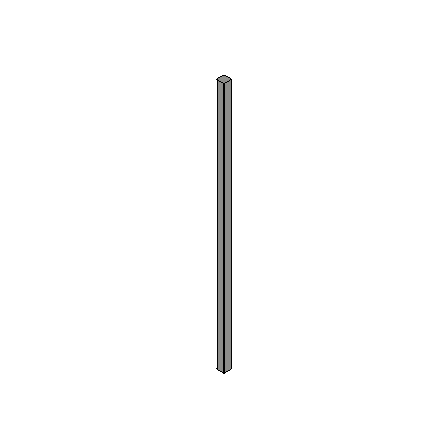

In [4]:
sample = ds[0][0]
print(sample['cadquery']) 
sample["image"]

import cadquery as cq
# Generating a workplane for sketch 0
wp_sketch0 = cq.Workplane(cq.Plane(cq.Vector(0.0, 0.0, -0.3515625), cq.Vector(3.749399456654644e-33, 1.0, -6.123233995736766e-17), cq.Vector(1.0, 0.0, 6.123233995736766e-17)))
loop0=wp_sketch0.moveTo(0.19736842105263158, 0.0).lineTo(0.2368421052631579, 0.0).lineTo(0.35526315789473684, 0.0).lineTo(0.39473684210526316, 0.0).lineTo(0.5131578947368421, 0.0).lineTo(0.5526315789473685, 0.0).lineTo(0.75, 0.0).lineTo(0.75, 0.35526315789473684).lineTo(0.5131578947368421, 0.35526315789473684).lineTo(0.2368421052631579, 0.35526315789473684).lineTo(0.0, 0.35526315789473684).lineTo(0.0, 0.0).close()
solid0=wp_sketch0.add(loop0).extrude(0.125, both=True)
solid=solid0
# Generating a workplane for sketch 1
wp_sketch1 = cq.Workplane(cq.Plane(cq.Vector(0.0, 0.234375, 0.0), cq.Vector(3.749399456654644e-33, 1.0, -6.123233995736766e-17), cq.Vector(1.0, 0.0, 6.123233995736766e-17)))
loop1=wp_sketch1.moveTo(0.28125, 0.0).lineTo(0.28125, 0.1243421052

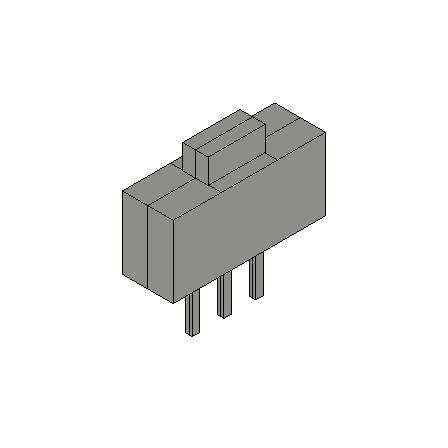

In [5]:
sample = ds[0][4]
print(sample['cadquery']) 
sample["image"]

So, like humans, our model have to look at the image first and then associate the code, but the code has a "positional hierachy", so we have to consider that for later 

## Look the image

In [6]:
import random
from torchvision import transforms
import torch
n_samples = ds[0].num_rows
sample_size = 100

random_indices = random.sample(range(n_samples), sample_size)

images = [ds[0][i]["image"] for i in random_indices]
preprocess = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # se vuoi 3 canali anche da grigio
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  # da PIL a tensor float [0,1]
])


tensor_images = [preprocess(img) for img in images]

# Stack tensor
stacked = torch.stack(tensor_images)

mean = stacked.mean(dim=[0, 2, 3])
std = stacked.std(dim=[0, 2, 3])

print("Mean per canale:", mean)
print("Std per canale:", std)




Mean per canale: tensor([0.9075, 0.9075, 0.9075])
Std per canale: tensor([0.1837, 0.1837, 0.1837])


The entire dataset is too big, so we first look at a small part and then leverage


In [7]:
# Carico entrambi i split contemporaneamente
ds_train, ds_test = ds[0], ds[1]

# Opzionale: prendo solo sottoinsiemi per test veloci
ds_train = ds_train.select(range(100))
ds_test = ds_test.select(range(20))

print("Train size:", len(ds_train))
print("Test size:", len(ds_test))

Train size: 100
Test size: 20


In [ ]:
from torchvision import transforms
import torch

# Mean e std calcolati in precedenza
mean = mean.tolist()  # se sono tensori torch
std = std.tolist()

preprocess_norm = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # mantieni 3 canali se vuoi
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])

# Se vuoi solo un sottoinsieme per test veloce, usa ds_train_sub = ds_train.select(range(1000)) per esempio
ds_train_sub = ds_train  # o sottoinsieme

# Esempio senza batch (puoi parallelizzare con DataLoader dopo)
all_tensors = []
for i in range(len(ds_train_sub)):
    img = ds_train_sub[i]['image']  # PIL Image
    tensor_img = preprocess_norm(img)  # Tensor 3x224x224 normalizzato
    all_tensors.append(tensor_img)

# Se la memoria lo consente, crea un batch tensor unico
all_tensors_batch = torch.stack(all_tensors)  # shape: [N, 3, 224, 224]

print("Shape tensore batch immagini preprocessate:", all_tensors_batch.shape)


Shape tensore batch immagini preprocessate: torch.Size([100, 3, 224, 224])


In [9]:
import re
from collections import Counter

class SimpleTokenizer:
    def __init__(self, texts, min_freq=1):
        self.pattern = r"[\w\.]+|[^\s\w]"  # parole (con punti) o simboli singoli
        self.build_vocab(texts, min_freq)

    def build_vocab(self, texts, min_freq):
        # Conta i token su tutto il corpus
        counter = Counter()
        for text in texts:
            tokens = self.tokenize(text)
            counter.update(tokens)
        
        # Filtro per frequenza minima
        tokens = [tok for tok, freq in counter.items() if freq >= min_freq]
        
        # Aggiungo token speciali
        self.pad_token = "<PAD>"
        self.unk_token = "<UNK>"
        self.bos_token = "<BOS>"
        self.eos_token = "<EOS>"

        vocab = [self.pad_token, self.unk_token, self.bos_token, self.eos_token] + sorted(tokens)
        
        self.token2id = {tok: i for i, tok in enumerate(vocab)}
        self.id2token = {i: tok for tok, i in self.token2id.items()}
        self.vocab_size = len(vocab)
        
    def tokenize(self, text):
        return re.findall(self.pattern, text)
    
    def encode(self, text, add_special_tokens=True):
        tokens = self.tokenize(text)
        ids = [self.token2id.get(tok, self.token2id[self.unk_token]) for tok in tokens]
        if add_special_tokens:
            ids = [self.token2id[self.bos_token]] + ids + [self.token2id[self.eos_token]]
        return ids
    
    def decode(self, ids, skip_special_tokens=True):
        tokens = [self.id2token.get(i, self.unk_token) for i in ids]
        if skip_special_tokens:
            tokens = [t for t in tokens if t not in {self.pad_token, self.bos_token, self.eos_token}]
        return " ".join(tokens)


In [10]:
ds_train[0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=448x448>,
 'deepcad_id': '0000/00006371',
 'cadquery': 'import cadquery as cq\n# Generating a workplane for sketch 0\nwp_sketch0 = cq.Workplane(cq.Plane(cq.Vector(-0.015625, -0.0078125, 0.0), cq.Vector(1.0, 0.0, 0.0), cq.Vector(0.0, 0.0, 1.0)))\nloop0=wp_sketch0.moveTo(0.0, 0.0).threePointArc((0.0007948582418457166, -0.0019189575476279677), (0.0027138157894736844, -0.0027138157894736844)).lineTo(0.021217105263157895, -0.0027138157894736844).threePointArc((0.022787161438489866, -0.00206347722796355), (0.0234375, -0.000493421052631579)).lineTo(0.0234375, 0.018256578947368422).threePointArc((0.02283825686147997, 0.019949990385858287), (0.021217105263157895, 0.020723684210526318)).lineTo(0.0022203947368421052, 0.020723684210526318).threePointArc((0.0005992431385200307, 0.019949990385858287), (0.0, 0.018256578947368422)).lineTo(0.0, 0.0).close()\nsolid0=wp_sketch0.add(loop0).extrude(0.75)\nsolid=solid0\n',
 'token_count': 1292,


In [11]:
# Supponiamo tu abbia una lista di codici CadQuery (testo)
all_codes = [sample["cadquery"] for sample in ds_train]  # adatta al tuo dataset

tokenizer = SimpleTokenizer(all_codes, min_freq=2)

# Codice di esempio
code_sample = all_codes[0]

encoded = tokenizer.encode(code_sample)
print("Encoded:", encoded)

decoded = tokenizer.decode(encoded)
print("Decoded:", decoded)


Encoded: [2, 385, 379, 377, 380, 4, 374, 376, 406, 384, 396, 15, 407, 373, 383, 5, 381, 5, 382, 5, 8, 37, 7, 8, 31, 7, 16, 6, 7, 382, 5, 331, 7, 16, 7, 16, 6, 7, 382, 5, 16, 7, 16, 7, 331, 6, 6, 6, 386, 373, 409, 5, 16, 7, 16, 6, 14, 5, 5, 1, 7, 8, 1, 6, 7, 5, 23, 7, 8, 23, 6, 6, 13, 5, 44, 7, 8, 23, 6, 14, 5, 5, 1, 7, 8, 1, 6, 7, 5, 47, 7, 8, 17, 6, 6, 13, 5, 47, 7, 40, 6, 14, 5, 5, 1, 7, 42, 6, 7, 5, 44, 7, 43, 6, 6, 13, 5, 1, 7, 43, 6, 14, 5, 5, 1, 7, 42, 6, 7, 5, 16, 7, 40, 6, 6, 13, 5, 16, 7, 16, 6, 11, 5, 6, 400, 373, 408, 5, 386, 6, 12, 5, 294, 6, 397, 373, 400, 3]
Decoded: import cadquery as cq # Generating a workplane for sketch 0 wp_sketch0 = cq.Workplane ( cq.Plane ( cq.Vector ( - 0.015625 , - 0.0078125 , 0.0 ) , cq.Vector ( 1.0 , 0.0 , 0.0 ) , cq.Vector ( 0.0 , 0.0 , 1.0 ) ) ) loop0 = wp_sketch0.moveTo ( 0.0 , 0.0 ) .threePointArc ( ( <UNK> , - <UNK> ) , ( 0.0027138157894736844 , - 0.0027138157894736844 ) ) .lineTo ( 0.021217105263157895 , - 0.0027138157894736844 ) .threePo

In [12]:
import torch
from torch.nn.utils.rnn import pad_sequence
tokenized_codes = [tokenizer.encode(ele) for ele in all_codes]
padded_codes = pad_sequence([torch.tensor(seq) for seq in tokenized_codes], batch_first=True, padding_value=tokenizer.token2id[tokenizer.pad_token])
decoder_input = padded_codes[:, :-1]   # togli ultimo token EOS
decoder_target = padded_codes[:, 1:]   # togli primo token BOS

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch
from torch.cuda.amp import autocast, GradScaler

# 1) Carica modello + processor pre-addestrati
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.train()

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
scaler = GradScaler()  # per mixed precision

# --- Funzione per chunkare il testo in token ID di lunghezza max 512 ---
def chunk_token_ids(text, max_len=512):
    input_ids = processor.tokenizer.encode(text, add_special_tokens=True)
    chunks = []
    for i in range(0, len(input_ids), max_len):
        chunks.append(input_ids[i:i+max_len])
    return chunks

# --- Funzione per preparare batch tensor dai token ID chunkati ---
def prepare_inputs_from_token_ids(token_ids_list):
    return processor.tokenizer.pad(
        {"input_ids": token_ids_list},
        padding=True,
        return_tensors="pt"
    )

# Parametri
batch_size = 8  # piccolo batch per non esaurire memoria
num_epochs = 1  # numero di epoche da impostare

N = len(all_codes)

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    total_loss = 0.0

    for i in range(0, N, batch_size):
        batch_texts = all_codes[i:i+batch_size]
        batch_imgs = all_tensors_batch[i:i+batch_size].to(device)

        # Chunkizzo i testi nel batch (lista di liste di chunk token id)
        batch_token_chunks = [chunk_token_ids(text, max_len=512) for text in batch_texts]

        max_chunks = max(len(chunks) for chunks in batch_token_chunks)
        empty_chunk = processor.tokenizer.encode("", add_special_tokens=True)

        for chunks in batch_token_chunks:
            while len(chunks) < max_chunks:
                chunks.append(empty_chunk)

        chunked_batches = list(zip(*batch_token_chunks))

        optimizer.zero_grad()
        for chunk_batch in chunked_batches:
            inputs = prepare_inputs_from_token_ids(chunk_batch)
            inputs = {k: v.to(device) for k, v in inputs.items()}
            inputs['pixel_values'] = batch_imgs

            labels = inputs['input_ids'].clone()
            labels[labels == processor.tokenizer.pad_token_id] = -100

            with autocast():  # mixed precision context
                outputs = model(**inputs, labels=labels)
                loss = outputs.loss

            scaler.scale(loss).backward()
            total_loss += loss.item()

        scaler.step(optimizer)
        scaler.update()

    print(f"Loss totale epoca {epoch+1}: {total_loss}")

# Salva modello + processor fine-tunati
model.save_pretrained("./fine_tuned_blip")
processor.save_pretrained("./fine_tuned_blip")


C:\Users\rocco\AppData\Local\Temp\ipykernel_5460\42756360.py:14: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()  # per mixed precision
c:\Users\rocco\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\amp\grad_scaler.py:136: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (788 > 512). Running this sequence through the model will result in indexing errors
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
C:\Users\rocco\AppData\Local\Temp\ipykernel_5460\42756360.py:66: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `t

0
8
16
24
32
40
48
56
64
72
80
88
96
Loss totale su tutto il dataset: 222.2348108291626


[]

Guys, i tried to build my custom Encoder-Decoder network, but it crashed for memory leak and i lost all the code, then i rewrite it from the start and tried to fine-tune blip pre trained model, 5h has gone, i'm just here waiting for the results on small part don't knowing if it would be acceptable, i had fun and i think this matter no? but seriuosly talking, i think this approach that consider a lot the domain of the application in preproccess of the data would be a great runner for such specific task, i worked in CAD for 2 years, in buildings, before Switching to IT and the processing of images of cad models can't be the same of a picture with cats and dogs, colors and shapes has to be perfect because in mechanicals and buildings, size matter! 
So, i think that if my code had enough time or resources to run it would be great but i don't think we can see it on full dataset but only on a small portion using 1 epoch and very very small batch

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch

# Carica modello e processor fine-tunati
processor = BlipProcessor.from_pretrained("./fine_tuned_blip")
model = BlipForConditionalGeneration.from_pretrained("./fine_tuned_blip")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# Prepara la lista di immagini da ds_test (oggetti PIL)
test_images = [ds_test[i]['image'] for i in range(0,1)] #len(ds_test)
print(test_images)

# Usa il processor per preparare input batch corretti (pixel_values + prompt testuale vuoto)
inputs = processor(
    images=test_images,
    text=["Generate the CADQuery code needed to create the CAD for the provided image. Just the code, no other words."] * len(test_images),  # prompt semplice per stimolare generazione
    return_tensors="pt",
    padding=True
).to(device)



with torch.no_grad():
    generated_ids = model.generate(
        input_ids=inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        pixel_values=inputs['pixel_values'],
        max_new_tokens=30000  # o un valore più adatto a te
    )

generated_texts = [processor.tokenizer.decode(g, skip_special_tokens=False) for g in generated_ids]

for i, text in enumerate(generated_texts):
    print(f"Testo generato per immagine {i}:")
    print(text)


[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=448x448 at 0x233C6B2FD90>]
Testo generato per immagine 0:
generate the cadquery code needed to create the cad for the provided image. just the code, no other words. vectortototoude vectortotoude [SEP]


Another time here, in the endless wait time of computation... time run like a fast horse in mongoloian green valleys 